In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# License: MIT

In [3]:
%matplotlib inline

## Packages

In [4]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import scipy.linalg as linalg
from pprint import pprint

import matplotlib.gridspec as gridspec
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import sys
import os
import copy
import string
import glob
import xarray as xr 

import warnings

## Modules

In [5]:
from custom_functions import MyJacobian, MySolve, MyIVP

# Assignment 4 Question 4

## Part A

### Define parameters

In [6]:
K = 6
delta = 1.3

### Define the predator-prey system

In [7]:
def predator_prey(t, x):
    dxdt = x[0] * (1 - x[0]/K) - (x[0] * x[1]) / (1 + 0.1 * x[0]**2)
    dydt = (x[0] * x[1]) / (1 + 0.1 * x[0]**2) - delta * x[1]
    return np.array([dxdt, dydt])

### Run MyIVP to simulate the solution behaviour

In [8]:
tspan = [0,150]
h=1e-3
x0 = np.array([1,1])

In [9]:
[xt, t, xend] = MyIVP(predator_prey, x0, tspan, h)

### Plot solution in time

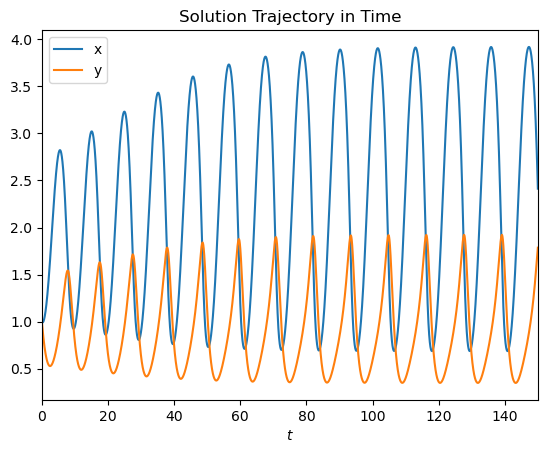

In [10]:
plt.plot(t,xt[0,:].T)
plt.plot(t,xt[1,:].T)
plt.xlabel("$t$")
plt.title("Solution Trajectory in Time")
plt.xlim(tspan)
plt.legend(["x","y"])
plt.show()

### Plot solution in phase space

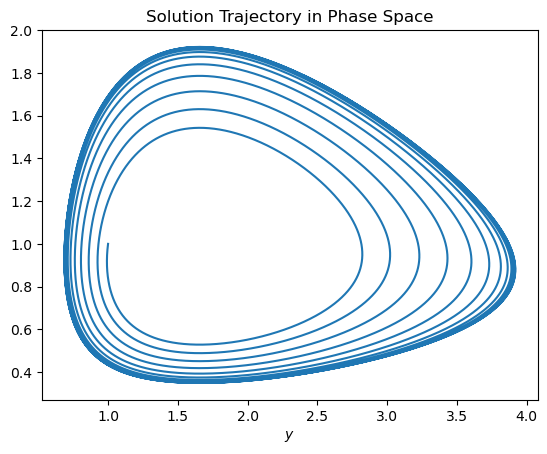

In [11]:
plt.plot(np.squeeze(xt[0,:].T,1), np.squeeze(xt[1,:].T,1))
plt.xlabel("$x$")
plt.xlabel("$y$")
plt.title("Solution Trajectory in Phase Space")
plt.show()

This appears to be an unstable focus converging to a periodic orbit.

## Part B

### Find the coexistence equilibrium

In [12]:
def predator_prey_no_t(x):
    dxdt = x[0] * (1 - x[0]/K) - (x[0] * x[1]) / (1 + 0.1 * x[0]**2)
    dydt = (x[0] * x[1]) / (1 + 0.1 * x[0]**2) - delta * x[1]
    return np.array([dxdt, dydt])

In [13]:
jacobian = lambda x: np.squeeze(MyJacobian(predator_prey_no_t, x, 1e-3),2)

In [14]:
x1, conv1, J1 = MySolve(predator_prey_no_t, xend, jacobian, 1e-6, 1000)

In [15]:
print("The equilibrium is: x = " + str(np.round(x1[0][0], 6)) + ", y = " + str(np.round(x1[1][0], 5)))

The equilibrium is: x = 1.656885, y = 0.92257


In [16]:
eig1, vec1 = np.linalg.eig(J1)

In [17]:
print("The eigenvalues of the equlibrium are " + str(np.round(eig1, 5)))

The eigenvalues of the equlibrium are [0.01784+0.73165j 0.01784-0.73165j]


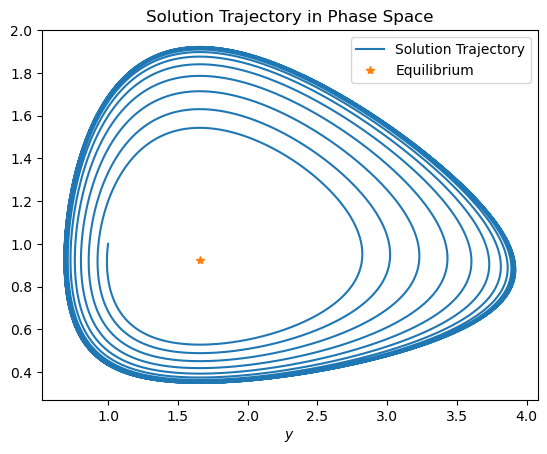

In [18]:
plt.plot(np.squeeze(xt[0,:].T,1), np.squeeze(xt[1,:].T,1), label="Solution Trajectory")
plt.plot(np.round(x1[0][0], 6), np.round(x1[1][0], 5), "*", label="Equilibrium")
plt.xlabel("$x$")
plt.xlabel("$y$")
plt.title("Solution Trajectory in Phase Space")
plt.legend()
plt.show()

Thus the coexistence equilibrium is an unstable focus.

## Part C

In [19]:
K = 5.5
delta = 1.3

In [20]:
tspan = [0,150]
h=1e-3
x0 = np.array([1,1])

In [21]:
[xt, t, xend] = MyIVP(predator_prey, x0, tspan, h)

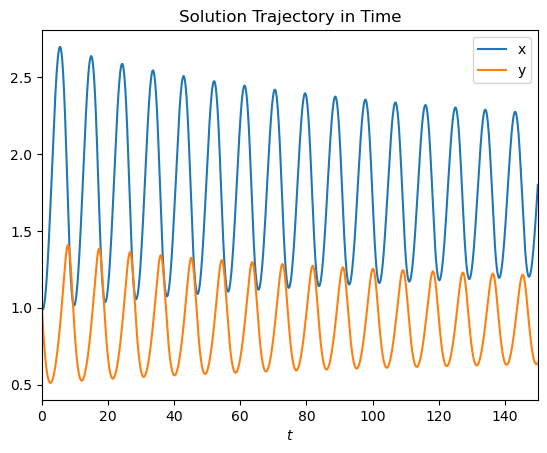

In [22]:
plt.plot(t,xt[0,:].T)
plt.plot(t,xt[1,:].T)
plt.xlabel("$t$")
plt.title("Solution Trajectory in Time")
plt.xlim(tspan)
plt.legend(["x","y"])
plt.show()

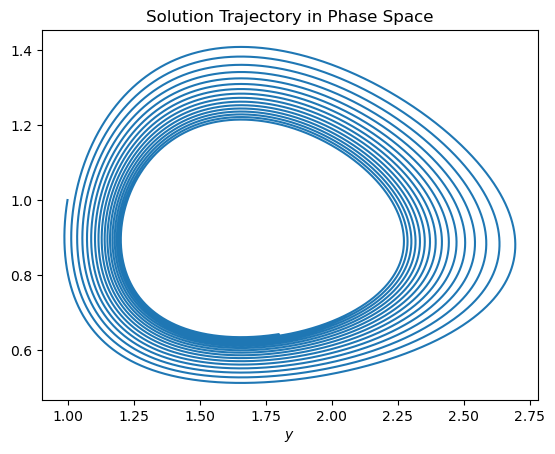

In [23]:
plt.plot(np.squeeze(xt[0,:].T,1), np.squeeze(xt[1,:].T,1))
plt.xlabel("$x$")
plt.xlabel("$y$")
plt.title("Solution Trajectory in Phase Space")
plt.show()

In [24]:
x1, conv1, J1 = MySolve(predator_prey_no_t, xend, jacobian, 1e-6, 1000)

In [25]:
print("The equilibrium is: x = " + str(np.round(x1[0][0], 6)) + ", y = " + str(np.round(x1[1][0], 5)))

The equilibrium is: x = 1.656885, y = 0.89057


In [26]:
eig1, vec1 = np.linalg.eig(J1)

In [27]:
print("The eigenvalues of the equlibrium are " + str(np.round(eig1, 5)))

The eigenvalues of the equlibrium are [-0.00012+0.71907j -0.00012-0.71907j]


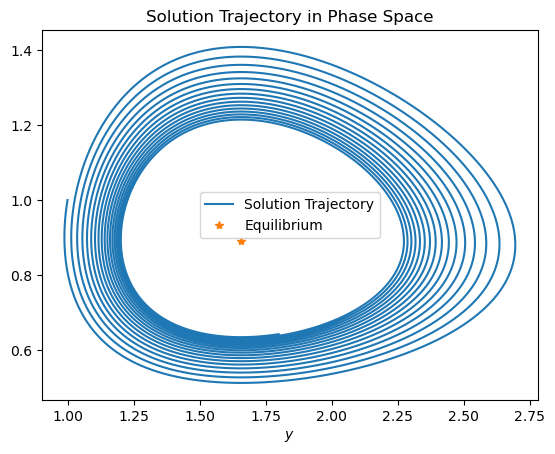

In [28]:
plt.plot(np.squeeze(xt[0,:].T,1), np.squeeze(xt[1,:].T,1), label="Solution Trajectory")
plt.plot(np.round(x1[0][0], 6), np.round(x1[1][0], 5), "*", label="Equilibrium")
plt.xlabel("$x$")
plt.xlabel("$y$")
plt.title("Solution Trajectory in Phase Space")
plt.legend()
plt.show()

This time the coexistence equilibrium appears to be center (converging to a small periodic orbit). Therefore we suspect a supercritical Hopf bifurcation.

## Part D

In [29]:
K = 5.5
delta = 1 / (2 * np.sqrt(0.1))

In [30]:
tspan = [0,150]
h=1e-3
x0 = np.array([1,1])

In [31]:
[xt, t, xend] = MyIVP(predator_prey, x0, tspan, h)

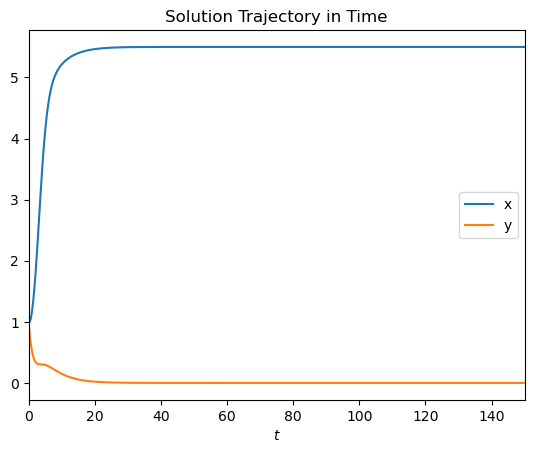

In [32]:
plt.plot(t,xt[0,:].T)
plt.plot(t,xt[1,:].T)
plt.xlabel("$t$")
plt.title("Solution Trajectory in Time")
plt.xlim(tspan)
plt.legend(["x","y"])
plt.show()

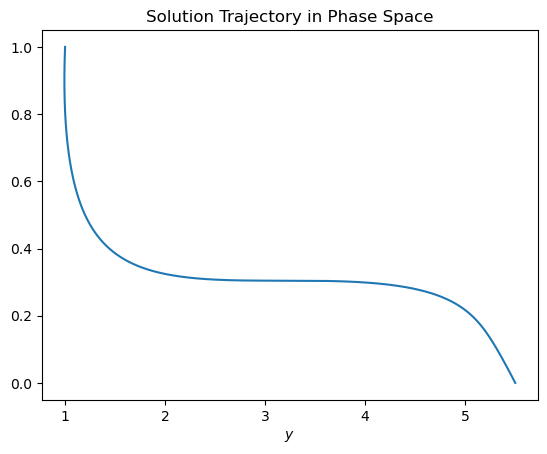

In [33]:
plt.plot(np.squeeze(xt[0,:].T,1), np.squeeze(xt[1,:].T,1))
plt.xlabel("$x$")
plt.xlabel("$y$")
plt.title("Solution Trajectory in Phase Space")
plt.show()

In [34]:
x1, conv1, J1 = MySolve(predator_prey_no_t, x1, jacobian, 1e-6, 1000)

In [35]:
print("The equilibrium is: x = " + str(np.round(x1[0][0], 6)) + ", y = " + str(np.round(x1[1][0], 5)))

The equilibrium is: x = 3.162277, y = 0.85008


In [36]:
eig1, vec1 = np.linalg.eig(J1)

In [37]:
print("The eigenvalues of the equlibrium are " + str(np.round(eig1, 5)))

The eigenvalues of the equlibrium are [-0.14992 -0.     ]


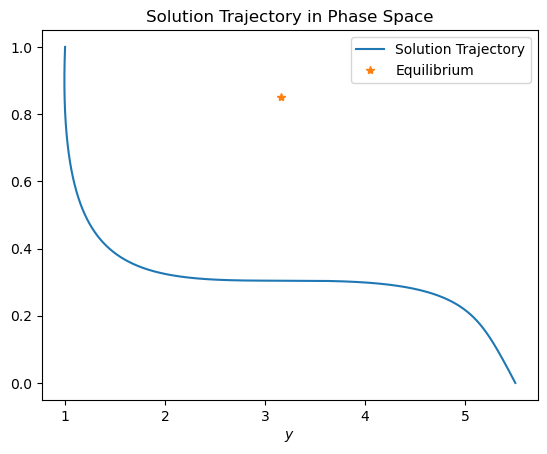

In [38]:
plt.plot(np.squeeze(xt[0,:].T,1), np.squeeze(xt[1,:].T,1), label="Solution Trajectory")
plt.plot(np.round(x1[0][0], 6), np.round(x1[1][0], 5), "*", label="Equilibrium")
plt.xlabel("$x$")
plt.xlabel("$y$")
plt.title("Solution Trajectory in Phase Space")
plt.legend()
plt.show()

The coexistence equilibrium is experiencing a fold (saddle-node) bifurcation.

## Part E

In [39]:
K = 2 / np.sqrt(0.1)
delta = 1 / (2 * np.sqrt(0.1))

In [40]:
tspan = [0,150]
h=1e-3
x0 = np.array([1,1])

In [41]:
[xt, t, xend] = MyIVP(predator_prey, x0, tspan, h)

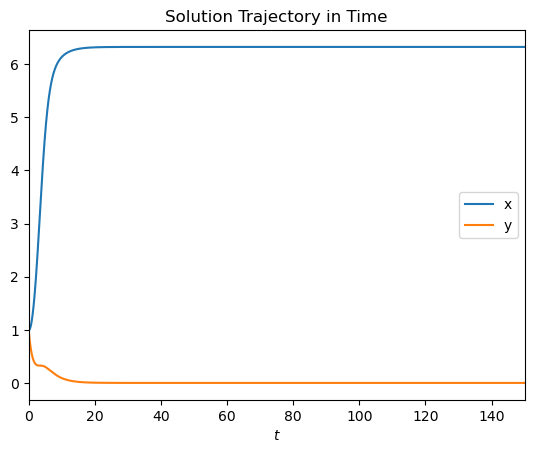

In [42]:
plt.plot(t,xt[0,:].T)
plt.plot(t,xt[1,:].T)
plt.xlabel("$t$")
plt.title("Solution Trajectory in Time")
plt.xlim(tspan)
plt.legend(["x","y"])
plt.show()

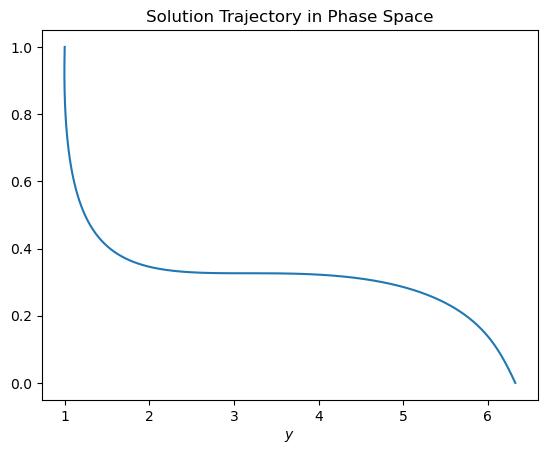

In [43]:
plt.plot(np.squeeze(xt[0,:].T,1), np.squeeze(xt[1,:].T,1))
plt.xlabel("$x$")
plt.xlabel("$y$")
plt.title("Solution Trajectory in Phase Space")
plt.show()

In [44]:
x1, conv1, J1 = MySolve(predator_prey_no_t, x1, jacobian, 1e-6, 1000)

In [45]:
print("The equilibrium is: x = " + str(np.round(x1[0][0], 6)) + ", y = " + str(np.round(x1[1][0], 5)))

The equilibrium is: x = 3.162277, y = 1.0


In [46]:
eig1, vec1 = np.linalg.eig(J1)

In [47]:
print("The eigenvalues of the equlibrium are " + str(np.round(eig1, 5)))

The eigenvalues of the equlibrium are [0.+0.00052j 0.-0.00052j]


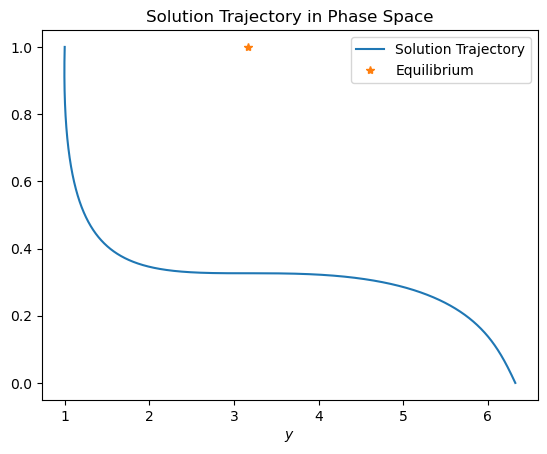

In [48]:
plt.plot(np.squeeze(xt[0,:].T,1), np.squeeze(xt[1,:].T,1), label="Solution Trajectory")
plt.plot(np.round(x1[0][0], 6), np.round(x1[1][0], 5), "*", label="Equilibrium")
plt.xlabel("$x$")
plt.xlabel("$y$")
plt.title("Solution Trajectory in Phase Space")
plt.legend()
plt.show()

The coexistence equilibrium is experiencing a Bogdanov-Takens (double zero eigenvalue) bifurcation.